<a href="https://colab.research.google.com/github/pedromendesjr/projetosDS/blob/main/Projeto_Predi%C3%A7%C3%A3o_de_pre%C3%A7os_de_carros_usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Pedro Lourenço Mendes Júnior*

# Projeto de predição de preços de carros usados:


O estudo dos preços de carros usados por meio da análise de dados tem se tornado cada vez mais relevante e necessário nos dias atuais. O mercado de veículos usados é vasto e diversificado, desempenhando um papel fundamental na economia global. Com a crescente demanda por automóveis e a busca por opções mais acessíveis, compreender os fatores que influenciam os preços dos carros usados se tornou essencial tanto para compradores quanto para vendedores.

A análise de dados aplicada ao mercado de carros usados proporciona uma visão mais clara e objetiva das tendências, padrões e valores desses veículos. Antigamente, a determinação do preço de um carro usado dependia em grande parte da experiência e intuição dos profissionais do ramo, o que muitas vezes levava a estimativas imprecisas e subjetivas. No entanto, com o advento da era digital e o acesso a vastas quantidades de informações, tornou-se possível utilizar técnicas avançadas de data science para obter insights mais precisos e confiáveis.


O presente notebook faz parte de um portfólio de estudos práticos na área da Data Science, já que esses são uma excelente maneira de colocar em prática os conceitos teóricos aprendidos previamente. Ao realizar um projeto como este, temos a oportunidade de aplicar técnicas de coleta e limpeza de dados, estatística descritiva, visualização de dados, pré-processamento, scalling, seleção de atributos e algoritmos de machine learning, bem como de avaliação dos modelos de machine learning. 

# 0. Importando as Bibliotecas e os dados:

In [ ]:
# Importando as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from feature_engine.selection import DropCorrelatedFeatures
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [ ]:
# # Importando os dados do Kaggle:

# # Install Kaggle
# !pip install -q kaggle

# from google.colab import files
# files.upload()

# # Create a kaggle folder
# ! mkdir ~/.kaggle

# # Copy the kaggle.json to folder created
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

# # Download do dataset
# !kaggle datasets download -d lepchenkov/usedcarscatalog

# #Unzip dataset
# !unzip usedcarscatalog.zip

In [ ]:
# Lendo o dataset:

data = pd.read_csv('cars.csv')

# 1. Conhecendo os dados:

In [ ]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
print(f'O dataset possui, inicialmente, {data.shape[0]} linhas e {data.shape[1]} colunas.\n')
print(f'As colunas do dataset são: {data.columns}.')

O dataset possui, inicialmente, 38531 linhas e 30 colunas.

As colunas do dataset são: Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object').


## Descrição das colunas do dataset:

**manufacturer_name**: Nome da fabricante (marca) do carro;

**model_name**: Modelo do carro;


**tranmission**: Tipo de transmissão (manual ou automática);


**color**: Cor do carro;

**odometer_value**: Quilometragem do carro;

**year_produced**: Ano de produção;

**engine_fuel**: Tipo de combustível usado

**engine_has_gas**: Presença de tanque de propulsão;

**engine_type**: Tipo de motor;

**engine_capacity**: Capacidade do motor;

**body_type**: Tipo de carroceria;

**has_warranty**: Carro na garantia;

**state**: Estado do carro - Novo, Usado ou Emergencial (Gravemente danificado);

**drivetrain**: Tipo de tração do carro;

**price_usd**: Preço em dólares;

**is_exchangeable**: Se está disponível para troca;

**location_region**: Região da Bielorrúsia onde o carro se encontra;

**number_of_photos**: Números de fotos do anúncio do carro;

**up_counter**: Número de atualizações no anúncio;

**feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9**: São atributos do carro como presença de rodas de liga leve, freio ABS, ar condicionado, banco de couro e etc;

**duration_listed**: Duração do anúncio do carro.

Algumas dessas colunas possuem informações que não agregam ao estudo proposto, e neste caso, não haverá problemas em eliminar as colunas. São elas: **up_counter, is_exchangeable, duration_listed**. 

In [ ]:
data.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [ ]:
# Remover colunas desnecessárias:
data = data.drop(['up_counter','is_exchangeable','duration_listed'], axis=1);


Além disso, o nosso estudo será apenas nos carros usados, então devemos verificar o atributo **state** para termos uma visualização melhor do nosso dataset quanto a carros novos e usados. 

"owned" = Usado

"new" = Novo

"emergency" = Gravemente danificado

Sendo assim, temos interesse apenas nos carros usados (owned). 

In [ ]:
# Verificando o estado dos carros:
data['state'].value_counts().to_frame()

,state
owned,37723
new,438
emergency,370


In [ ]:
# Excluindo os carros novos e gravemente danificados:
data_owned = data[data.state == 'owned'].reset_index();
data_owned = data_owned.drop(['state'], axis=1);
data_owned.shape

(37723, 27)

In [ ]:
data_owned.describe()

,index,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos
count,37723.000000,37723.000000,37723.000000,37713.000000,37723.000000,37723.000000
mean,19162.534873,251565.032659,2002.815736,2.060795,6473.964881,9.626726
std,11104.679025,133654.143689,7.897627,0.674246,6066.784518,6.097695
min,0.000000,1.000000,1942.000000,0.200000,1.000000,1.000000
25%,9571.500000,160000.000000,1998.000000,1.600000,2150.000000,5.000000
50%,19114.000000,250000.000000,2003.000000,2.000000,4750.000000,8.000000
75%,28651.500000,325000.000000,2009.000000,2.300000,8800.000000,12.000000
max,38530.000000,1000000.000000,2019.000000,8.000000,50000.000000,86.000000


# 2. Visualizando e Preparando os Dados:

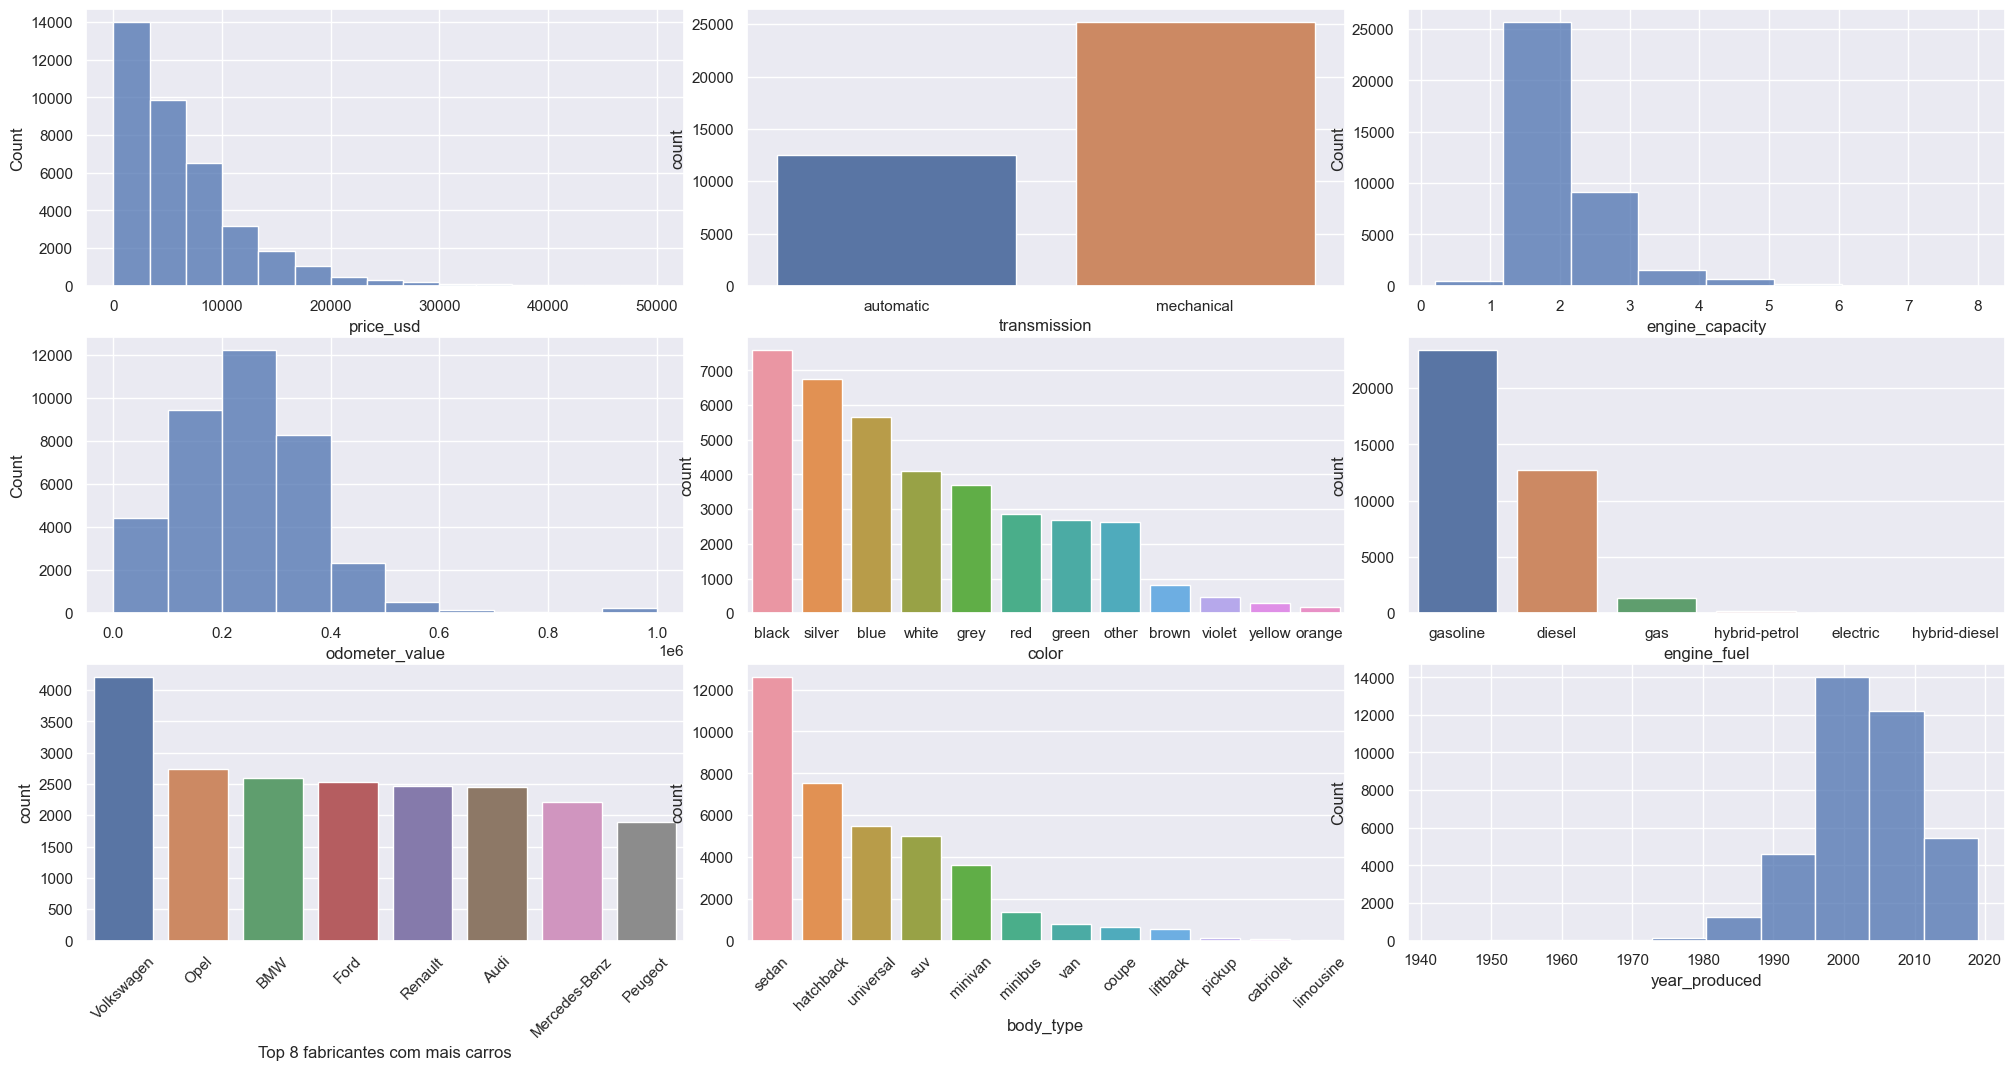

In [ ]:
# Plotar gráficos de algumas variáveis:
fig, axes = plt.subplots(3,3, figsize=(20,10))
plt.tight_layout()
sns.set_theme(style='darkgrid')
hist_price = sns.histplot(x='price_usd',data=data_owned,bins = 15, ax=axes[0,0])
count_transmission = sns.countplot(x='transmission',data=data_owned, ax=axes[0,1])
hist_engine = sns.histplot(x='engine_capacity', data=data_owned, bins = 8, ax=axes[0,2])
count_body = sns.countplot(x = 'body_type', data=data_owned, order = data_owned['body_type'].value_counts().index, ax=axes[2,1])
count_body.set_xticklabels(count_body.get_xticklabels(), rotation = 45)
count_color = sns.countplot(x = 'color', data=data_owned, order = data_owned['color'].value_counts().index, ax=axes[1,1])
count_engine = sns.countplot(x='engine_fuel', data=data_owned, order = data_owned['engine_fuel'].value_counts().index, ax=axes[1,2])
count_manufacturer = sns.countplot(x = 'manufacturer_name', data=data_owned, order = data_owned['manufacturer_name'].value_counts().iloc[:8].index, ax=axes[2,0])
count_manufacturer.set_xticklabels(count_manufacturer.get_xticklabels(), rotation = 45)
count_manufacturer.set_xlabel('Top 8 fabricantes com mais carros')
hist_odometer = sns.histplot(x='odometer_value',data=data_owned,bins = 10, ax=axes[1,0])
hist_year = sns.histplot(x='year_produced',data=data_owned,bins = 10, ax=axes[2,2])


Dessa forma, percebemos alguns detalhes do nosso dataset:



*   A grande maioria dos carros custa até USD 20000, mas existem alguns carros que ultrapassam bastante esse valor e poderá ser difícil de precificalos. 
*   A maioria dos carros possuem motores de 1.0 até 3.0 porém temos carros com motores maior/mais fortes. 
*   Existe uma variedade grande de cores no nosso dataset. 
*   Por termos poucos carros elétricos e hibridos, talvez seja interessante focar apenas nos carros a combustão mais tradicionais. 
*   Temos alguns tipos de carros mais excêntricos, como limousines. Como o objetivo é mais de aprendizado, vamos excluir esses carros do dataset. 


In [ ]:
data_owned['body_type'].value_counts().to_frame()

,body_type
sedan,12600
hatchback,7534
universal,5457
suv,4975
minivan,3591
minibus,1363
van,796
coupe,646
liftback,547
pickup,127


In [ ]:
# Retirando as limousines do dataset:
print(f'Dataset antes de retirar limousines: {data_owned.shape}.\n')
data_owned.drop(data_owned[data_owned['body_type'] == 'limousine'].index, inplace = True)
print(f'Dataset após retirar limousines: {data_owned.shape}.')

Dataset antes de retirar limousines: (37723, 27).

Dataset após retirar limousines: (37711, 27).


In [ ]:
data_owned['engine_fuel'].value_counts().to_frame()

,engine_fuel
gasoline,23400
diesel,12733
gas,1332
hybrid-petrol,235
electric,10
hybrid-diesel,1


In [ ]:
# Retirando os carros elétricos e híbridos/diesel do dataset:
print(f'Dataset antes de retirar elétricos e híbridos/diesel: {data_owned.shape}.\n')
data_owned.drop(data_owned[data_owned['engine_fuel'] == 'electric'].index, inplace = True)
data_owned.drop(data_owned[data_owned['engine_fuel'] == 'hybrid-diesel'].index, inplace = True)
print(f'Dataset após retirar elétricos e híbridos/diesel: {data_owned.shape}.')

Dataset antes de retirar elétricos e híbridos/diesel: (37711, 27).

Dataset após retirar elétricos e híbridos/diesel: (37700, 27).


In [ ]:
data_owned['model_name'].value_counts().to_frame()

,model_name
Passat,1413
Astra,747
Golf,701
A6,685
Mondeo,631
...,...
Alero,1
Impala,1
360,1
244,1


Um outro problema presente nos dados é a grande diversidade de modelos de automóveis. Afim de simplificar o projeto, vamos trabalhar apenas com os modelos que aparecem, pelo menos, 15 vezes no nosso dataset. 

In [ ]:
# Retirando os modelos com menos de 15 aparições no dataset:
model_counts = data_owned['model_name'].value_counts()
model_to_keep = model_counts[model_counts >= 15].index.tolist()
data_clean = data_owned[data_owned['model_name'].isin(model_to_keep)]

print(f'Dataset após a retirada dos modelos mais raros: {data_clean.shape}')

Dataset após a retirada dos modelos mais raros: (34459, 27)


In [ ]:
# Alterando o Ano de Fabrição (year_produced) para tempo de uso do carro:
# Como os dados foram obtidos em 2019, vamos subtrair o ano de produção de 2019.

data_clean['year_produced'] = 2019 - data_clean['year_produced']
data_clean = data_clean.rename(columns={'year_produced': 'year'})

C:\Users\pedri\AppData\Local\Temp\ipykernel_5956\3135974677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['year_produced'] = 2019 - data_clean['year_produced']


### Visualizando a variável alvo (price_usd) em relação a outras variáveis:

A dificuldade em determinar o valor de um carro se dá justamente pelos diferentes fatores que impactam nos atributos do veículo, na demanda de mercado, no gosto pessoal e etc. Desta forma, vamos visualizar algumas variáveis do nosso dataset em relação ao preço. 

Inicialmente, podemos sugerir que o odometro do carro é um atributo importante, já que carros com mais rodagem devem perder valor de mercado. Além disso, o câmbio (manual/automático), o ano de fabricação e a tamanho do motor podem ser atributos interessantes para se definir o valor do automóvel. 

Mas uma maneira melhor de visualizar essas sugestões é uma matriz/gráfico de correlação como o seguinte: 

,price_usd,odometer_value,year,engine_capacity,number_of_photos
price_usd,1.000000,-0.397497,-0.723664,0.315114,0.299805
odometer_value,-0.397497,1.000000,0.485816,0.122801,-0.129057
year,-0.723664,0.485816,1.000000,-0.004722,-0.242312
engine_capacity,0.315114,0.122801,-0.004722,1.000000,0.107084
number_of_photos,0.299805,-0.129057,-0.242312,0.107084,1.000000


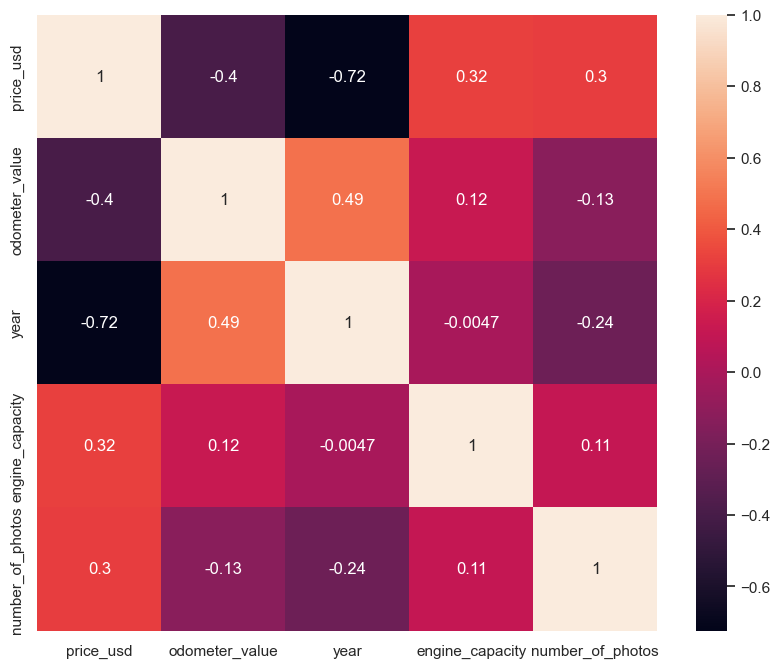

In [ ]:
# Matriz de correlação:

# Criando a matriz:

corr_data = data_clean[['price_usd', 'odometer_value','year', 'engine_capacity','number_of_photos']].corr(method = 'pearson')
display(corr_data)

# Plotando o resultado:

plt.figure(figsize=(10,8))
sns.heatmap(corr_data, annot=True)
plt.show()

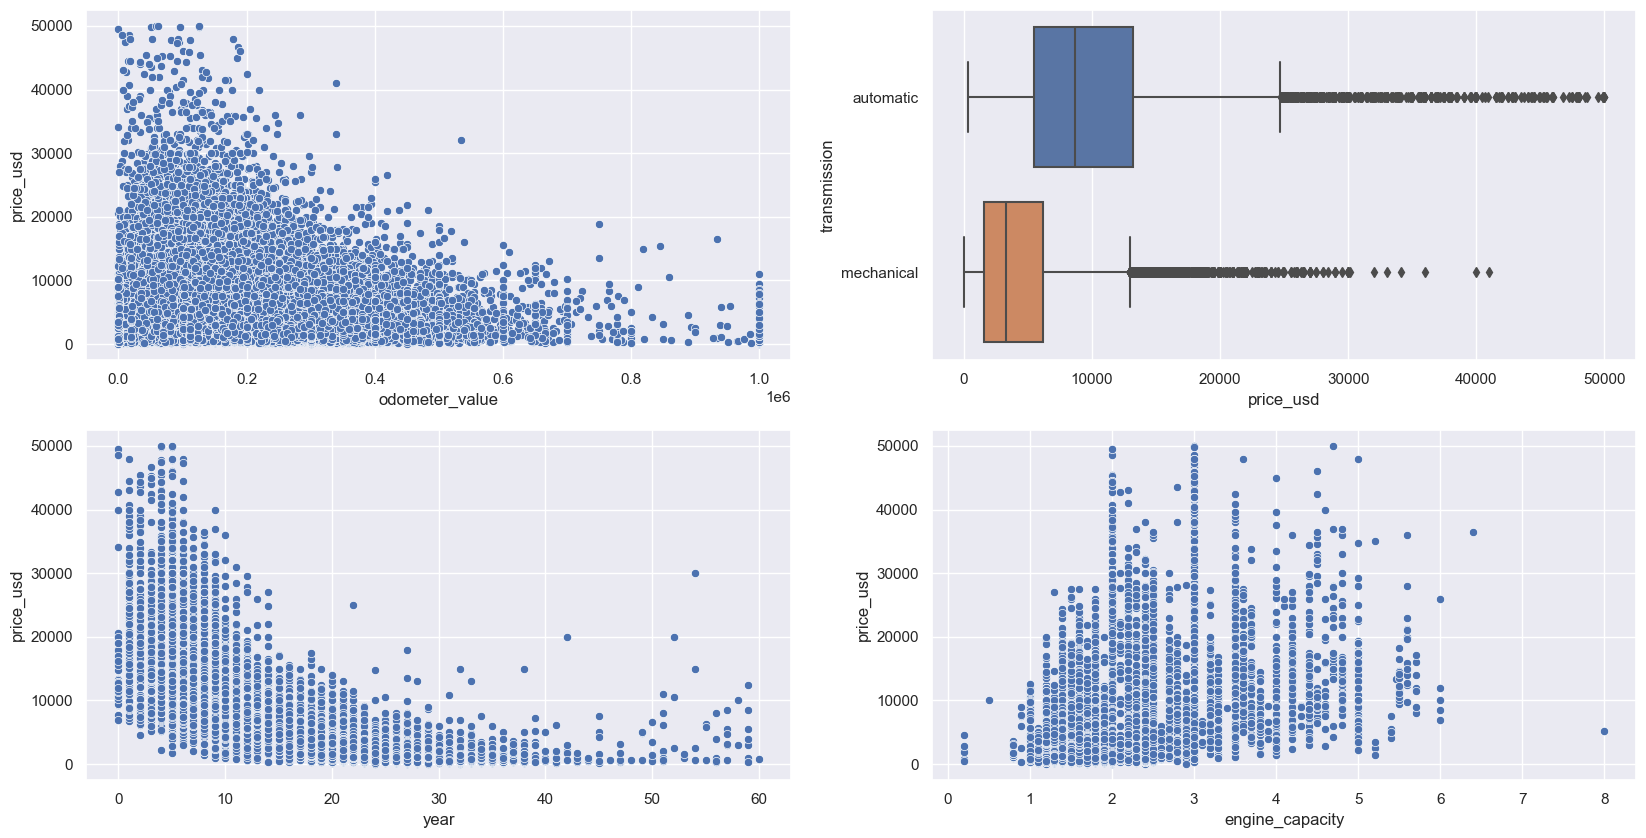

In [ ]:
# Plotar gráficos de algumas variáveis:
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.set_theme(style='darkgrid')

price_odometro = sns.scatterplot(x=data_clean['odometer_value'], y=data_clean['price_usd'], ax=axes[0,0])
price_transmission = sns.boxplot(data=data_clean, y = 'transmission', x='price_usd', ax=axes[0,1])
price_year = sns.scatterplot(data=data_clean, x='year', y='price_usd', ax=axes[1,0])
price_engine = sns.scatterplot(data=data_clean, x='engine_capacity', y='price_usd', ax=axes[1,1])


Os gráficos corroboram com a suspeita de que os carros mais novos (tanto em rodagem quanto em ano) possuem um valor mais alto, além disso, o time de transmissão também parece ser um atributo importante. A capacidade do motor não parece ser tão determinante para o preço. 

Algumas colunas do nosso dataset são booleanas, sendo assim, utilizaremos uma função map para transformar numa coluna de 0 e 1. 
   

In [ ]:
# Separando as colunas booleanas: 

bool_features = list(set(data_clean.select_dtypes(include='bool').columns.values))

for i in bool_features:
    data_clean[i] = data_clean[i].map({True:1,False:0})
    

# Separando as colunas Categóricas e as Numéricas:

categorical_columns = data_clean.select_dtypes(exclude = 'number').columns.to_list()
numerical_columns = data_clean.drop(['price_usd'],axis = 1).select_dtypes(include = 'number').columns.to_list()

print(f'Variáveis Categórias: {categorical_columns}.\n')
print(f'Variáveis Numéricas: {numerical_columns}')

Variáveis Categórias: ['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'drivetrain', 'location_region'].

Variáceis Numéricas: ['index', 'odometer_value', 'year', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'number_of_photos', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


In [ ]:
data_clean['drivetrain'].value_counts().to_frame()

,drivetrain
front,25431
rear,4618
all,4410


# 3. Regressão Linear:

### 3.1. Divisão em Treino e Test:

In [ ]:
# Split - Treino e Teste:

# Cópia do Dataset:
df = data_clean.copy()

target = df['price_usd']
df = df.drop(['price_usd','index'], axis=1)

# Divisão:
X_train, X_test, y_train, y_test = train_test_split(df, target)

print(f'Tamanho do dataset X_train: {X_train.shape}.\n')
print(f'Tamanho do dataset X_test: {X_test.shape}.\n')
print(f'Tamanho do dataset y_train: {y_train.shape}.\n')
print(f'Tamanho do dataset y_test: {y_test.shape}.\n')

Tamanho do dataset X_train: (25844, 25).

Tamanho do dataset X_test: (8615, 25).

Tamanho do dataset y_train: (25844,).

Tamanho do dataset y_test: (8615,).



### 3.2 Pipeline do Modelo:

In [ ]:
# Categorial Transformer:
categorical_transformer =  Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

# Preprocessor:
preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_columns)
])

# Pipeline:

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('standardscaler', StandardScaler()),
    ('dropcorrelated', DropCorrelatedFeatures()),
    ('model', LinearRegression())
])

# Treinar o modelo:
pipe.fit(X_train, y_train)

# Predições no dataset de test:
y_pred = pipe.predict(X_test)

### 3.3 Desempenho do Modelo:

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

print(f'MAE: {mae(y_test,y_pred)}.\n')
print(f'MAPE: {mape(y_test,y_pred)}.\n')
print(f'MSE: {mse(y_test,y_pred, squared=False)}.\n')


MAE: 2452.9354940798353.

MAPE: 0.7266610045799211.

MSE: 3741.6582178090107.



## Discussões Finais:

Foi possível entender melhor sobre o dataset proposto e praticar algumas ferramentos da Data Science. Na etapa inicial, pudemos perceber algumas variáveis mais relevantes para o modelo e poderia-se propor a criação de novas variáveis ou a retirada de algumas delas. O desempenho do modelo ficou aquem do que gostariamos, já que um MAE de 2452 é um valor bastante considerável na valorização ou desvalorização do automóvel, já que os preços médios dos carros ficam na faixa dos 6000-7000 usd. 

Uma das possibilidade para melhorar o desempenho do modelo é priorizar alguns anúncios mais recentes, ou ainda agrupar em menos os dados das variáveis categóricas com multi-classses, trabalhar com cross-validation, estratificação e etc. 

Ainda assim, como um objeto de estudo e aprendizado, acredito que os ganhos durante a realização desse projeto foram bastante significativos para o meu desenvolvimento na área.